In [1]:
from LSTM_trainer import *
from models.conditionalLSTM import ConditionalEncoding, ConditionalAttn
from data.data import get_dataloader_LSTM
from LSTM_trainer import flat_accuracy, trainer

There are 1 GPU(s) available.
We will use the GPU: Tesla M40 24GB


In [2]:
data_file = "combine_balanced.csv"
BATCH = 32
MAX_LEN = 128
EPOCHS = 15
EARLY_STOP = 2
LR = 5e-5
# LR = 5e-6
# WD = 1e-2
WD = 1e-3
# WD = 1e-4
EPS = 1e-8

In [3]:
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

In [4]:
train_dataloader, validation_dataloader = get_dataloader_LSTM(tokenizer, data_file, BATCH, MAX_LEN)

loading data ...


  0%|          | 285/101082 [00:00<00:35, 2822.85it/s]

Encoding sentences ...


100%|██████████| 101082/101082 [00:18<00:00, 5434.12it/s]


Get dataloader ...
torch.Size([101082, 128])
torch.Size([101082, 128])
101082
75811 25271
2370 790


In [5]:
from torch.optim.lr_scheduler import StepLR

classifier = ConditionalEncoding(embedding_dim=768, hidden_dim=128, num_layers=1, label_size=2)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    # Filter for all parameters which *don't* include 'bias', 'gamma', 'beta'.
    {'params': [p for n, p in classifier.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': WD},
            
    # Filter for parameters which *do* include those.
    {'params': [p for n, p in classifier.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}]

optimizer = AdamW(optimizer_grouped_parameters, lr = LR, eps = EPS)

total_steps = len(train_dataloader)

# Create the learning rate scheduler.
# scheduler = get_linear_schedule_with_warmup(optimizer, 
#                                             num_warmup_steps = 0, # Default value in run_glue.py
#                                             num_training_steps = total_steps)
scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95)

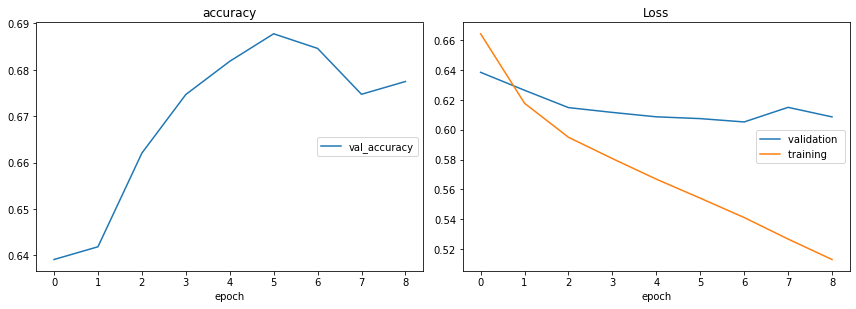

accuracy
	val_accuracy     	 (min:    0.639, max:    0.688, cur:    0.677)
Loss
	validation       	 (min:    0.605, max:    0.638, cur:    0.609)
	training         	 (min:    0.513, max:    0.664, cur:    0.513)
early_stopping, epoch: 9
Final dev loss 48.078842 Final Train Loss 121.611680 Final dev accuracy 0.677483
Best dev loss 47.811356 Best dev accuracy 0.684616
F1_score Sarcasm  (0.6836820083682008, 0.6515151515151515, 0.6672111065741119, None)
F1_score Non-Sarcasm  (0.6719219219219219, 0.7030636292223095, 0.6871401151631478, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) PairAttnLSTM
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "check.pt")

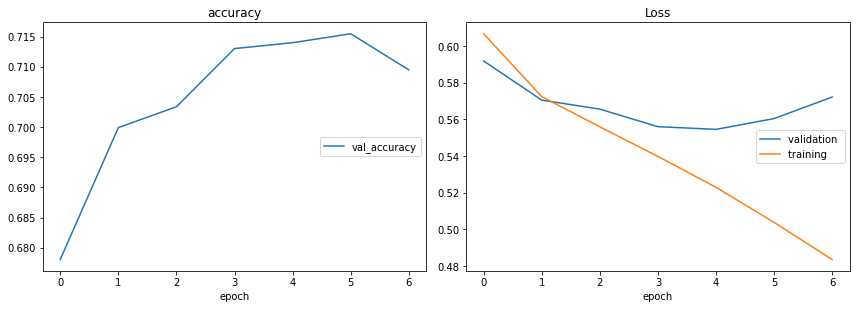

accuracy
	val_accuracy     	 (min:    0.678, max:    0.715, cur:    0.709)
Loss
	validation       	 (min:    0.555, max:    0.592, cur:    0.572)
	training         	 (min:    0.483, max:    0.607, cur:    0.483)
early_stopping, epoch: 7
Final dev loss 452.042133 Final Train Loss 1145.854562 Final dev accuracy 0.709480
Best dev loss 438.087662 Best dev accuracy 0.713974
F1_score Sarcasm  (0.688469905728789, 0.757097288676236, 0.7211545765286745, None)
F1_score Non-Sarcasm  (0.7346920999912899, 0.6625559657528867, 0.6967619362299686, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) ConditionalEncoding
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "checkpoint_CondEnc.pt")

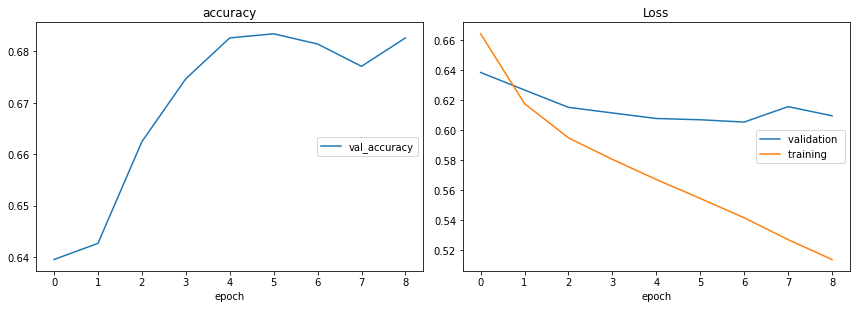

accuracy
	val_accuracy     	 (min:    0.640, max:    0.683, cur:    0.683)
Loss
	validation       	 (min:    0.605, max:    0.638, cur:    0.610)
	training         	 (min:    0.514, max:    0.664, cur:    0.514)
early_stopping, epoch: 9
Final dev loss 48.162002 Final Train Loss 121.783199 Final dev accuracy 0.682626
Best dev loss 47.829621 Best dev accuracy 0.681439
F1_score Sarcasm  (0.6819645732689211, 0.6754385964912281, 0.6786858974358975, None)
F1_score Non-Sarcasm  (0.6832684824902724, 0.6897093479968578, 0.6864738076622361, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) ConditionalEncoding
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "check.pt")

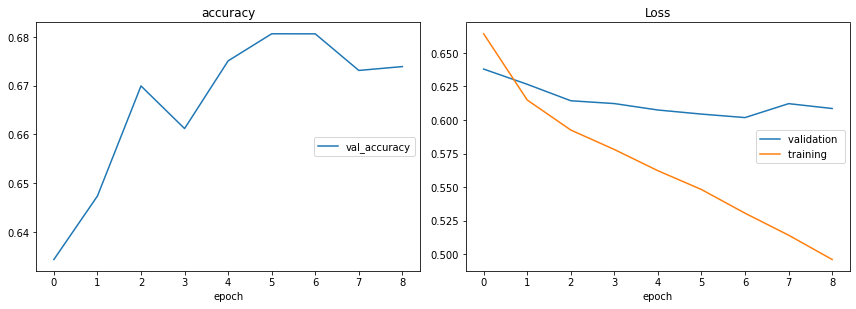

accuracy
	val_accuracy     	 (min:    0.634, max:    0.681, cur:    0.674)
Loss
	validation       	 (min:    0.602, max:    0.638, cur:    0.609)
	training         	 (min:    0.496, max:    0.664, cur:    0.496)
early_stopping, epoch: 9
Final dev loss 48.073514 Final Train Loss 117.558549 Final dev accuracy 0.673923
Best dev loss 47.539697 Best dev accuracy 0.680635
F1_score Sarcasm  (0.6847079037800687, 0.6355661881977671, 0.6592224979321754, None)
F1_score Non-Sarcasm  (0.6647101980924431, 0.7117046347211312, 0.6874051593323217, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) ConditionalAttention
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "check.pt")

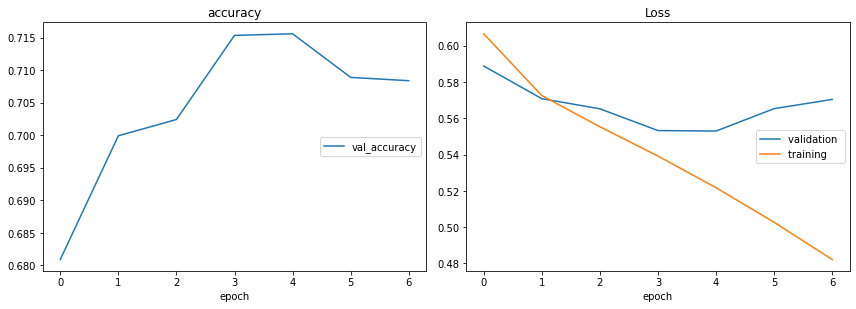

accuracy
	val_accuracy     	 (min:    0.681, max:    0.716, cur:    0.708)
Loss
	validation       	 (min:    0.553, max:    0.589, cur:    0.570)
	training         	 (min:    0.482, max:    0.606, cur:    0.482)
early_stopping, epoch: 7
Final dev loss 450.568875 Final Train Loss 1142.742224 Final dev accuracy 0.708372
Best dev loss 436.803899 Best dev accuracy 0.715580
F1_score Sarcasm  (0.6832293734051602, 0.7686602870813397, 0.723431401981387, None)
F1_score Non-Sarcasm  (0.7401236226820748, 0.6489670882098814, 0.6915543651125806, None)


In [6]:
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "CE_checkpoint.pt")